# 주성분분석법(PCA)

### 차원의 저주 (Surse of dimensionality)

다변량 자료분석시 차원의 증가에 따라 발생하는 문제들을 말함

**Example : 3 클래스 패턴인식문제**

1. 특징공간을 일정한 구역으로 나누기 
2. 각 구역에 속한 각 클래스 샘플들의 비를 구하기 
3. 새로운 샘플에 대하여, 해당하는 구역을 찾아 그 구역에서 우세한 클래스로 선택하기

**1개의 특징** : 아래와 같이 1차원 축을 세 부분으로 나누게 될 때 너무 많은 부분에서 클래스들이 겹치게 됨

In [96]:
from IPython.display import Image
Image(url= "http://jun.hansung.ac.kr/PR/images/1d.png", width=220, height=15)

**2개의 특징** 사용하면 bin 의 개 수는 9개로 증가
(1) 각 bin 마다 포함되는 표본의 개수를 일정하게 하던지 ( 표본 수가 1차원의 9 개 에서 2차원의 27 개로 증가) 또는
(2) 1차원의 경우와 같은 수의 표본을 유지하던지를 (매우 희박한 2차원 분산플롯)
선택을 해야 한다. 

In [99]:
from IPython.display import Image
Image(url= "http://jun.hansung.ac.kr/PR/images/2d.png", width=500, height=50)

**3 개의 특징** 을 사용하게 되면 문제는 더욱 심각하다. Bin 의 개 수는 3^3=27 개가 되고,
(1) bin 마다 같은 표본 밀도를 유지하고 싶으면 81개의 표본이 (2) 같은 수의 표본을 사용하면 너무 많은 bin 들이 비어있게 된다.

In [93]:
from IPython.display import Image
Image(url= "http://jun.hansung.ac.kr/PR/images/3d.png", width=290, height=100)

**벡터의 차원이 높아짐에 따라 생길 수 있는 문제점들**
* 특징이 많으면 잡음 특징들까지 포함되므로 오히려 분류에 상처를 줄 뿐이다.
* 특징이 많으면 패턴 분류기에 의한 학습과 인식 속도가 느려진다.
* 특징이 많으면 모델링에 필요한 학습 집합의 크기가 커진다. 

실제로 “차원의 저주”는 주어진 표본의 크기에서 분류기의 성능을 개선하기 보다는 감소시키는 최대 특징 수 가 존재함을 의미한다.

In [100]:
from IPython.display import Image
Image(url= "http://jun.hansung.ac.kr/PR/images/performance.png", width=300, height=30)

**차원의 저주를 극복하기 위해서는**
1. 사전지식을 활용하거나
2. 타겟 함수의 smoothness를 증가시키거나
3. 차원을 줄인다.


**차원 축소의 두 가지 방법**
* 특징선택 (feature selection) : 전체 특징들로부터 부분집합을 선택함

\begin{gather}
\begin{bmatrix}
       x_1 \\
       x_2 \\
       \vdots \\
       x_N
\end{bmatrix}
\rightarrow
\text{feature selection}
\rightarrow
\begin{bmatrix}
       x_{i1} \\
       x_{i2} \\
       \vdots \\
       x_{iN}
\end{bmatrix}
\end{gather}

* 특징추출 (feature extraction) : 기존의 특징들의 조합으로 구성된 새로운 특징들의 부분집합을 생성함. 

\begin{gather}
\begin{bmatrix}
       x_1 \\
       x_2 \\
       \vdots \\
       x_N
\end{bmatrix}
\rightarrow
\text{feature extraction}
\rightarrow
\begin{bmatrix}
       y_1 \\
       y_2 \\
       \vdots \\
       y_M
\end{bmatrix}
=f \left(
\begin{bmatrix}
       x_1 \\
       x_2 \\
       \vdots \\
       x_N
\end{bmatrix}
\right)
\end{gather}

최적의 매핑 $y=f(x)$ 는 비선형 함수일 수 있지만, 특징 추출에서는 $y=Wx$ 와 같은 선형변환으로 국한


\begin{gather}
\begin{bmatrix}
       x_1 \\
       x_2 \\
       \vdots \\
       x_N
\end{bmatrix}
\rightarrow
\text{feature extraction}
\rightarrow
\begin{bmatrix}
       y_1 \\
       y_2 \\
       \vdots \\
       y_M
\end{bmatrix}
= \begin{bmatrix}
       w_{11} &  w_{12}  & \dots  &  w_{1N}  \\
       w_{21} &  w_{22}  & \dots  &  w_{2N} \\
       \vdots & \vdots & \ddots   & \vdots  \\
        w_{M1} &  w_{M2}  & \dots  &  w_{MN} 
\end{bmatrix}
\begin{bmatrix}
       x_1 \\
       x_2 \\
       \vdots \\
       x_N
\end{bmatrix}
\end{gather}



특징추출 매핑 $y=f(x)$의 선택은 우리가 최적화시키고자 하는 목적에 의해서 결정되며, 크게 두 가지 방법이 있다.
* **신호표현(Signal Representation)**: 특징추출 매핑의 목적이 낮은 차원공간에서 정확하게 표현하고자 함일 경우 $\rightarrow$ 주성분분석법 (PCA: Principal Components Analysis)
* **분류(Classification)**: 특징추출매핑의 목적이 낮은 차원에서의 클래스 구분을 증대하고자 함일 경우 $\rightarrow$ 선형판별분석법(LDA: Linear Discriminant Analysis)

In [107]:
from IPython.display import Image
Image(url= "http://jun.hansung.ac.kr/PR/images/feature-extraction.png", width=350, height=350)

## PCA Example
**Problem**  다음과 같이 주어지는 2차원 자료에 대한 주성분을 계산하시오.
 $$ X = [x_1, x_2] = \{(1,2), (3,3), (3,5), (5,4), (5,6), (6,5), (8,7), (9,8)\} $$

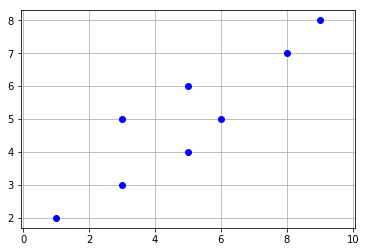

In [69]:
import matplotlib.pyplot as plt
X = [[1,3,3,5,5,6,8,9], [2,3,5,4,6,5,7,8]]
plt.plot(X[0], X[1], 'bo')
plt.axis('equal')
plt.grid()
plt.show()

**Solution**
- 공분산 행렬
$ \sum_x = \left[
\begin{matrix}
6.25 & 4.25\\
4.25 & 3.5
\end{matrix}
\right] $
-  고유값(eigenvalue)은 다음과 같은 특성방정식이 0이 되는 경우이다.

$$ \Sigma_x v = \lambda v \Rightarrow |\Sigma_x - \lambda I | = 0 $$

$$ \left|
\begin{matrix}
6.25-\lambda & 4.25\\
4.25 & 3.5-\lambda
\end{matrix}
\right|
= 0 $$

$$\lambda_1=9.34  ,  \lambda_2=0.41 $$

- 고유백터가 이문제의 답이며, 다음과 같이 구한다.

$$ \left[
\begin{matrix}
6.25 & 4.25\\
4.25 & 3.5
\end{matrix}
\right]
\left[
\begin{matrix}
v_{11}\\
v_{12}
\end{matrix}
\right] = \left[
\begin{matrix}
\lambda_1 v_{11}\\
\lambda_1 v_{12}
\end{matrix}
\right] \Rightarrow
\left[
\begin{matrix}
v_{11}\\
v_{12}
\end{matrix}
\right] = \left[
\begin{matrix}
0.81\\
0.59
\end{matrix}
\right] $$


$$ \left[
\begin{matrix}
6.25 & 4.25\\
4.25 & 3.5
\end{matrix}
\right]
\left[
\begin{matrix}
v_{21}\\
v_{22}
\end{matrix}
\right] = \left[
\begin{matrix}
\lambda_2 v_{21}\\
\lambda_2 v_{22}
\end{matrix}
\right] \Rightarrow
\left[
\begin{matrix}
v_{21}\\
v_{22}
\end{matrix}
\right] = \left[
\begin{matrix}
-0.59\\
0.81
\end{matrix}
\right] $$


In [78]:
import numpy as np
X = [[1,3,3,5,5,6,8,9], [2,3,5,4,6,5,7,8]]
covar = np.cov(X,bias=True).round(2)
print(covar)
eval, evec = np.linalg.eig(covar)
print(eval.round(2))
print(evec.round(2))

[[ 6.25  4.25]
 [ 4.25  3.5 ]]
[ 9.34  0.41]
[[ 0.81 -0.59]
 [ 0.59  0.81]]


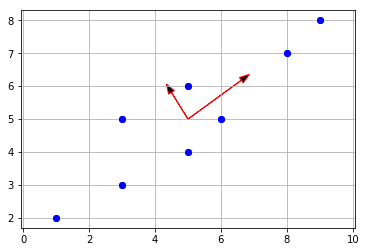

In [81]:
plt.plot(X[0], X[1], 'bo')
plt.arrow(5, 5, 2*0.81, 2*0.59, head_width=0.2, head_length=0.3, fc='k', ec='r')
plt.arrow(5, 5, -.5, .81, head_width=0.2, head_length=0.3, fc='k', ec='r')
plt.axis('equal')
plt.grid()
plt.show()